In [1]:
##Post modeling EDA should be on the predictions and see how those compare to the original 
# if there are a lot of songs that have the same rating like all the songs have 5, with the probability predicted ratings it gives
#more variety in the songs raitngs results 
# this is happening because we have one rating per track and that ratingi s binary therefore having the preidcted probability ratings intsead it gives more context 
#as to which songs are actually better or not and therefore my recommendations are stronger 

*Note: this notebook uses the "df_estimated" file that is saved in this repo's gitignore. To access this dataframe, run the last cell in the "Rec System" notebook that exports this dataframe's information to a csv file.*

# Post-Modeling EDA for Recommendation System 

In [2]:
#Import relevant packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import the estimated ratings dataframe 
est = pd.read_csv('df_estimated')
est.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
#Look at the first two rows of the data
est.head(2)

,artist_id,track_id,estimatedrating
0,6jJ0s89eD6GaHleKKya26X,4lCv7b86sLynZbXhfScfm2,2.882593
1,6jJ0s89eD6GaHleKKya26X,6tS3XVuOyu10897O3ae7bi,2.962649


In [5]:
#Look at the shape of the data
est.shape

(16265730, 3)

The shape of this dataframe is so large because there are predicted ratings for every artist_id, track_id pair in our dataset. Note that these "estimated ratings" are predictions based on the sum of the **probability** that the rating contains a certain value on a scale of 1-5. This allowed for non-integer values for ratings, which will provide more accuracy when determining how songs are rated compared to one another. 

For example, if many songs in the playlist are rated a value of 4, all of these songs will be ranked equally. However, if decimal points are included, it will be a lot easier to compare songs to one another. As a result, for the purpose of the post-modeling EDA, I have decided to use the estimated ratings from the probabilistic model that was built through XGBoost, rather than the purely integer related data, as I believe it will shed more light into the results of the predictions and how I can make conclusions on the results of the recommendation system models.

In [6]:
#Check for NA values 
est.isna().sum()

artist_id          0
track_id           0
estimatedrating    0
dtype: int64

In [7]:
#Check how many unique values of each column 
est.nunique()

artist_id              2327
track_id               6990
estimatedrating    11569319
dtype: int64

In [8]:
#Import the 'actual' ratings dataset 
act = pd.read_csv('modelingdata')
act.drop(['Unnamed: 0'], axis=1, inplace=True)
#Explore the first two rows of this dataset 
act.head(2)

,artist,artist_id,album,track_name,is_explicit,track_id,danceability,energy,key,loudness,...,genre_electronic,genre_hip hop,genre_house,genre_indie,genre_pop,genre_punk,genre_r&b,genre_rap,genre_rock,genre_soul
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,...,0,0,0,0,0,0,0,0,0,0
1,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,California Gurls,0,6tS3XVuOyu10897O3ae7bi,0.791,0.754,0,-3.729,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Check for NA values 
act.isna().sum()

artist              0
artist_id           0
album               0
track_name          0
is_explicit         0
track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
ratings             0
decade_1960         0
decade_1970         0
decade_1980         0
decade_1990         0
decade_2000         0
decade_2010         0
genrecategory       0
genre_acoustic      0
genre_country       0
genre_dance         0
genre_electronic    0
genre_hip hop       0
genre_house         0
genre_indie         0
genre_pop           0
genre_punk          0
genre_r&b           0
genre_rap           0
genre_rock          0
genre_soul          0
dtype: int64

In [10]:
#Merge the actual and estimated datasets 
df_inner = act.merge(est, how='inner')

In [11]:
#Look at first 5 rows of the merged dataframe 
df_inner.head()

,artist,artist_id,album,track_name,is_explicit,track_id,danceability,energy,key,loudness,...,genre_hip hop,genre_house,genre_indie,genre_pop,genre_punk,genre_r&b,genre_rap,genre_rock,genre_soul,estimatedrating
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,...,0,0,0,0,0,0,0,0,0,2.882593
1,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,California Gurls,0,6tS3XVuOyu10897O3ae7bi,0.791,0.754,0,-3.729,...,0,0,0,0,0,0,0,0,0,2.962649
2,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Last Friday Night (T.G.I.F.),0,455AfCsOhhLPRc68sE01D8,0.649,0.815,3,-3.796,...,0,0,0,0,0,0,0,0,0,2.776657
3,Katy Perry,6jJ0s89eD6GaHleKKya26X,One Of The Boys,I Kissed A Girl,0,14iN3o8ptQ8cFVZTEmyQRV,0.699,0.760,5,-3.173,...,0,0,0,0,0,0,0,0,0,3.079690
4,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Part Of Me,0,1nZzRJbFvCEct3uzu04ZoL,0.678,0.918,5,-4.630,...,0,0,0,0,0,0,0,0,0,2.794631


In [12]:
#Look at shape of this merged dataframe 
df_inner.shape

(7009, 40)

### Audio Features EDA

In [13]:
#Look at correlation of entire dataframe with estimated ratings 
df_inner.corr()['estimatedrating']

is_explicit        -0.005404
danceability        0.019515
energy              0.077558
key                -0.003126
loudness            0.010655
mode                0.044177
speechiness        -0.032119
acousticness       -0.069638
instrumentalness   -0.139772
liveness           -0.050281
valence             0.193934
tempo              -0.019135
duration_ms         0.193702
ratings             0.431777
decade_1960         0.096182
decade_1970         0.233396
decade_1980         0.284254
decade_1990         0.323048
decade_2000         0.433340
decade_2010        -0.718600
genre_acoustic     -0.056711
genre_country       0.001060
genre_dance         0.147694
genre_electronic   -0.206120
genre_hip hop       0.061277
genre_house        -0.012886
genre_indie        -0.328558
genre_pop           0.014634
genre_punk          0.327308
genre_r&b          -0.067201
genre_rap          -0.045403
genre_rock          0.178689
genre_soul          0.010180
estimatedrating     1.000000
Name: estimate

In [14]:
#Create new DataFrame which stacks the absolute values of the correlations and sorts them
df2 = df_inner.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#Create a 'pairs' column that groups the two variables whose correlations' are being compared
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

#Set this 'pairs' column as the index
df2.set_index(['pairs'], inplace = True)

#Drop the columns level_1 and level_0
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# Create a column 'cc' for correlation coefficient
df2.columns = ['cc']

#Drop dataframe duplicates 
df2.drop_duplicates(inplace=True)

#Display absolute correlations that are greater than 0.70
df2[(df2.cc>.70) & (df2.cc<1)]

,cc
pairs,
"(energy, loudness)",0.747688
"(estimatedrating, decade_2010)",0.718600
"(acousticness, energy)",0.707206
"(decade_2000, decade_2010)",0.701814


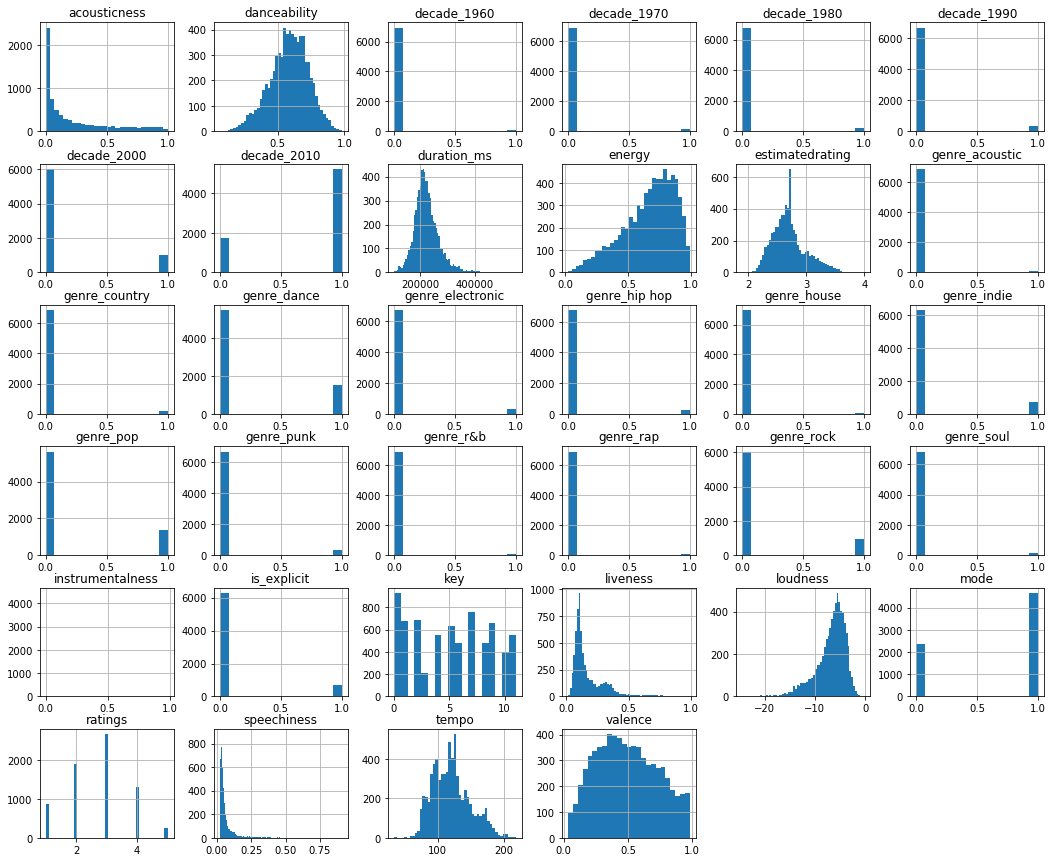

In [15]:
#First, let's plot a histogram for each column to preview their distributions 
df_inner.hist(figsize=(18,15), bins='auto');

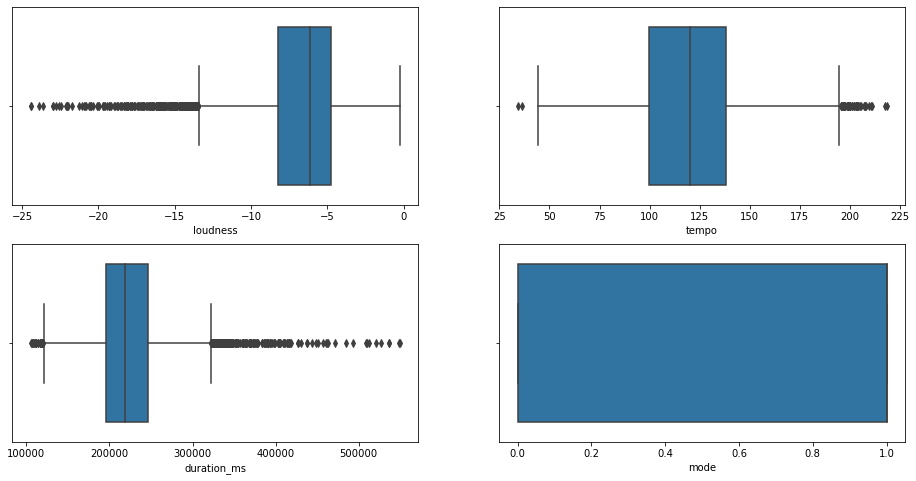

In [16]:
#Create boxplots to identify outliers for loudness, tempo, duration and mode
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.boxplot(x=df_inner['loudness'])
plt.subplot(222)
sns.boxplot(x=df_inner['tempo'])
plt.subplot(223)
sns.boxplot(x=df_inner['duration_ms'])
plt.subplot(224)
sns.boxplot(x=df_inner['mode'])

In [17]:
#Look at summary statistics of dataframe 
df_inner.describe()

,is_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_hip hop,genre_house,genre_indie,genre_pop,genre_punk,genre_r&b,genre_rap,genre_rock,genre_soul,estimatedrating
count,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,...,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000
mean,0.103438,0.586396,0.665499,5.141247,-6.879584,0.664289,0.069205,0.227596,0.034467,0.183475,...,0.036667,0.006278,0.103296,0.197175,0.045941,0.015409,0.012270,0.136539,0.022685,2.707873
std,0.304552,0.143534,0.205448,3.577704,3.094866,0.472272,0.066577,0.276501,0.132553,0.146656,...,0.187957,0.078988,0.304366,0.397894,0.209372,0.123181,0.110096,0.343384,0.148908,0.292487
min,0.000000,0.069200,0.023100,0.000000,-24.446000,0.000000,0.022400,0.000005,0.000000,0.015300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.895753
25%,0.000000,0.495000,0.536000,2.000000,-8.227000,0.000000,0.034400,0.015800,0.000000,0.094100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.507207
50%,0.000000,0.594000,0.704000,5.000000,-6.166000,1.000000,0.045300,0.095400,0.000009,0.123000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.675369
75%,0.000000,0.688000,0.828000,8.000000,-4.748000,1.000000,0.071300,0.362000,0.000912,0.231000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.843954
max,1.000000,0.979000,0.993000,11.000000,-0.276000,1.000000,0.907000,0.995000,0.983000,0.990000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.994051


### Additional EDA

First, I would like to look at the songs which received the highest average estimated ratings from our predictions. 

In [18]:
#Group the dataset by track name, and sort from highest to lowest average estimated ratings 
df_inner.groupby('track_name').mean()['estimatedrating'].sort_values(ascending=False)

track_name
Clocks                                 3.927068
Wake Me up When September Ends         3.797494
Basket Case                            3.794622
ATLiens                                3.758187
Sweet Child O' Mine                    3.752565
                                         ...   
Runaround Sue (Live from SXSW 2015)    2.007646
Heart Attack Blues                     2.001509
Dingue                                 2.000736
Fry                                    1.964443
Make You Wanna                         1.895753
Name: estimatedrating, Length: 6265, dtype: float64

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


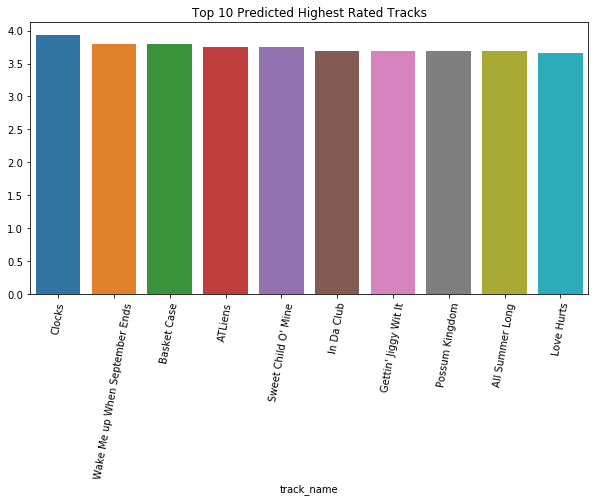

In [19]:
#Plot the top 10 predicted highest rated movies
plt.figure(figsize=(10,5))
topsongs = df_inner.groupby('track_name').mean()['estimatedrating'].sort_values(ascending=False).head(10)
sns.barplot(topsongs.index, topsongs.values)
plt.title('Top 10 Predicted Highest Rated Tracks')
plt.xticks(rotation=80);

Overall, across all songs, the top rated songs are Clocks, Wake Me Up When September Ends, Basket Case, ATLiens and Sweet Child O' Mine.

Next, I would like to see which *artists* received the highest estimated ratings on average. 

In [20]:
df_inner.groupby('artist').mean()['estimatedrating'].sort_values(ascending=False)

artist
50 Cent               3.696828
Toadies               3.687346
Kid Rock              3.685818
Guns N' Roses         3.678946
Will Smith            3.639238
                        ...   
TYSM                  2.044187
Telekinesis           2.024784
Futurebirds           2.001509
Emmanuelle Seigner    2.000736
Ta-ku                 1.895753
Name: estimatedrating, Length: 2093, dtype: float64

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


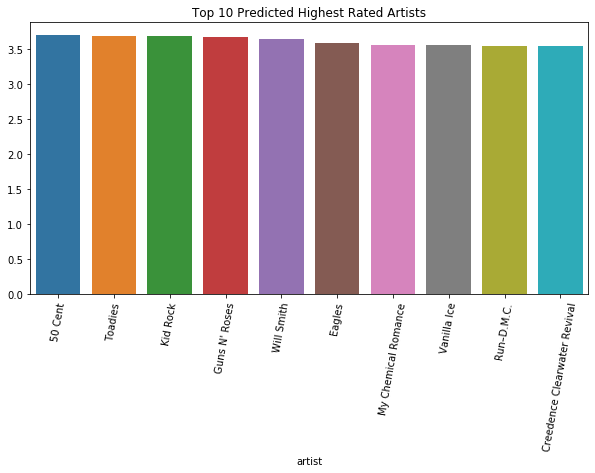

In [21]:
#Plot the top 10 predicted highest rated movies
plt.figure(figsize=(10,5))
topartists = df_inner.groupby('artist').mean()['estimatedrating'].sort_values(ascending=False).head(10)
sns.barplot(topartists.index, topartists.values)
plt.title('Top 10 Predicted Highest Rated Artists')
plt.xticks(rotation=80);

Overall, across all songs, the top rated artists are 50 Cent, Toadies, Kid Rock, Guns N' Roses and Will Smith.

The next step in this process will be to look at the distribution of the estimated ratings.

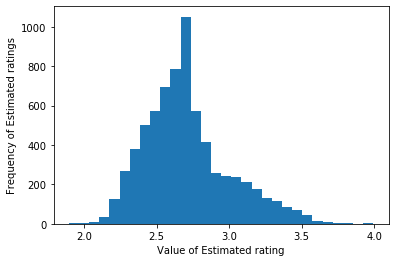

In [22]:
#Plot a histogram of the frequency of certain estimated rating values
plt.hist(df_inner['estimatedrating'],bins=30)
plt.xlabel('Value of Estimated rating')
plt.ylabel('Frequency of Estimated ratings')
plt.show()

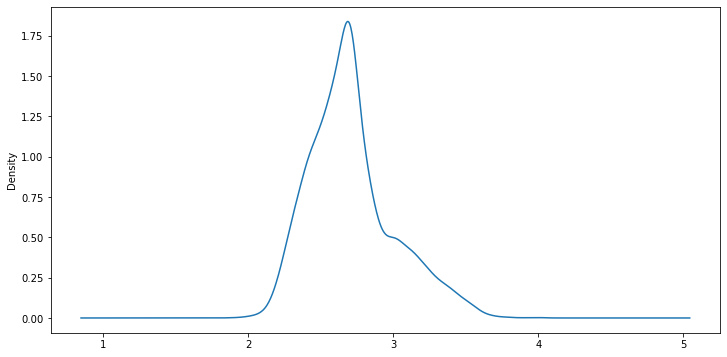

In [23]:
#Plot the KDE graph for estimated ratings
df_inner['estimatedrating'].plot(kind='kde', figsize = (12,6))
plt.show()

The estimated ratings peak at approximately 2.75. In the initial EDA process, the peak of the ratings appeared to be at 3.0; therefore, this post-modeling EDA does follow a similar pattern to what we saw previously, however it makes sense that our post-model distribution provides a more accurate result, due to the fact that the predictions are a result of probabilities, allowing a more exact, precise result. 

In [24]:
#Look at the most frequent songs in our playlist
df_inner.groupby('track_name').size().sort_values(ascending=False)

track_name
Smile                                       8
Gold                                        8
Closer                                      8
Hurricane                                   8
Heaven                                      7
                                           ..
Pray Everyday (Survivor's Guilt)            1
Pray With Me                                1
Prayers Up (feat. Travis Scott & A-Trak)    1
Premonitions                                1
"U" (feat. Merges)                          1
Length: 6265, dtype: int64

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


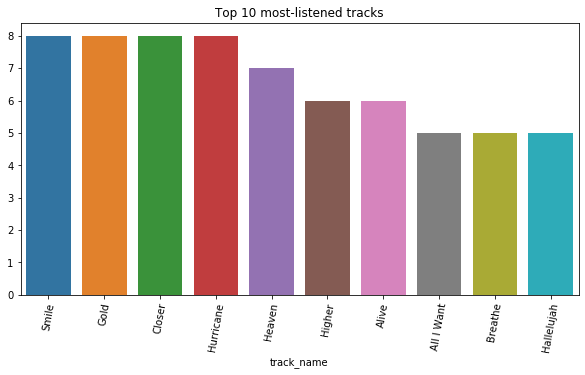

In [25]:
#Plot the top 10 most listened tracks 
plt.figure(figsize=(10,5))
toptracks = df_inner.groupby('track_name').size().sort_values(ascending=False).head(10)
sns.barplot(toptracks.index, toptracks.values)
plt.title('Top 10 most-listened tracks')
plt.xticks(rotation=80);

The top 5 tracks that appear the most in the playlist are Hurricane, Closer, Gold, Smile and Heaven. It is interesting that the songs that are played the most are not the ones that received the highest ratings; one would assume that if a song is really liked, it would be more frequently shown in the playlist. However, the graph above is not showing the playcount of each song, it is showing the frequency of the song coming up in the playlist, and we cannot conclude that these songs were actually played more than others, rather we only know for sure that they appear more frequently in the playlist list than others. 

In [26]:
#Perform an outer join on the dataframes
df_left = act.merge(est, how='outer')

In [27]:
#Check for NA values for artist_id and track_id 
df_left[['artist_id', 'track_id']].isna().sum()

artist_id    0
track_id     0
dtype: int64

In [28]:
#Print some of the original ratings' values 
df_inner['ratings'].head()

0    4
1    4
2    4
3    4
4    4
Name: ratings, dtype: int64

In [29]:
#Print some of the estimated ratings' values 
df_inner['estimatedrating'].head()

0    2.882593
1    2.962649
2    2.776657
3    3.079690
4    2.794631
Name: estimatedrating, dtype: float64

We see that the estimated ratings differ from the original ratings by approximately one point. This is likely partially due to the accuracy of estimated ratings incorporating the probabilities of each rating point, as well as a difference between the value of the estimated rating and the actual rating. Overall, a difference of 1 point on a 1-5 scale is not a major difference (whether someone rates a song a 3 rather than a 4 does not drastically affect the song results) and therefore I can conclude that the estimations of our results are a fair representation of the song ratings.

Next, I would like to perform a post-model EDA analysis regarding the genres' data.

In [30]:
#Create a dataframe that only contains the track name and the genre dummy variables 
matrix = df_inner.drop(['genrecategory', 'is_explicit', 'track_id', 'danceability', 
                  'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 
                  'duration_ms', 'ratings', 'decade_1960', 'decade_1970', 
                  'decade_1980', 'decade_1990', 'decade_2000', 'decade_2010', 
                  'artist_id', 'artist', 'album', 'estimatedrating'], axis=1)

In [31]:
#Look at which columns exist in the matrix dataframe 
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7008
Data columns (total 14 columns):
track_name          7009 non-null object
genre_acoustic      7009 non-null int64
genre_country       7009 non-null int64
genre_dance         7009 non-null int64
genre_electronic    7009 non-null int64
genre_hip hop       7009 non-null int64
genre_house         7009 non-null int64
genre_indie         7009 non-null int64
genre_pop           7009 non-null int64
genre_punk          7009 non-null int64
genre_r&b           7009 non-null int64
genre_rap           7009 non-null int64
genre_rock          7009 non-null int64
genre_soul          7009 non-null int64
dtypes: int64(13), object(1)
memory usage: 821.4+ KB


/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

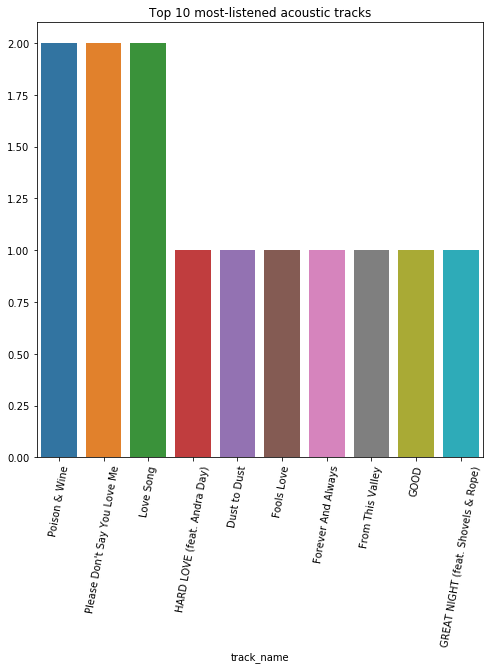

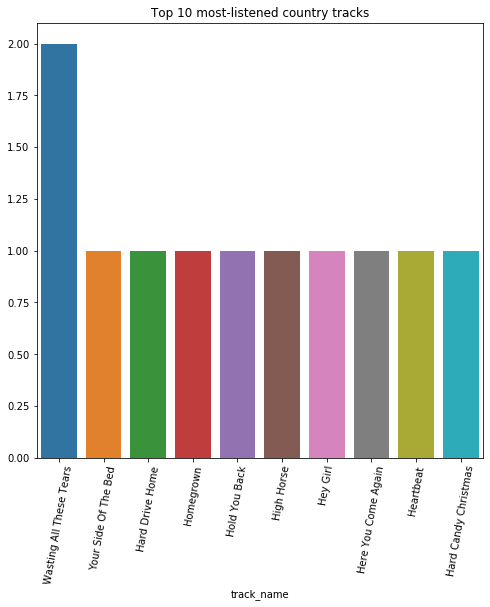

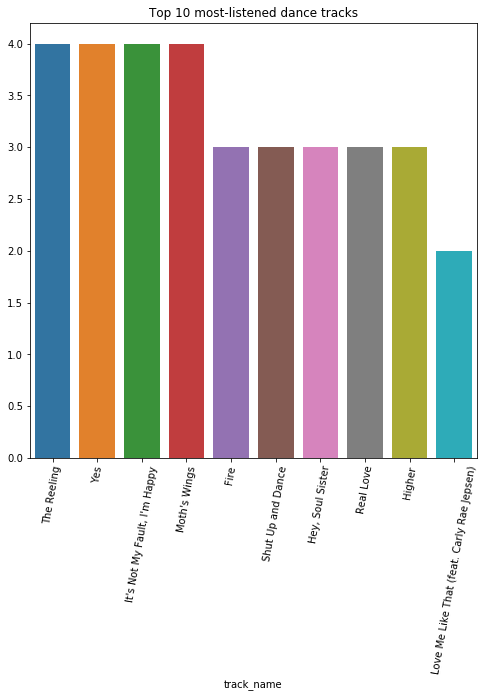

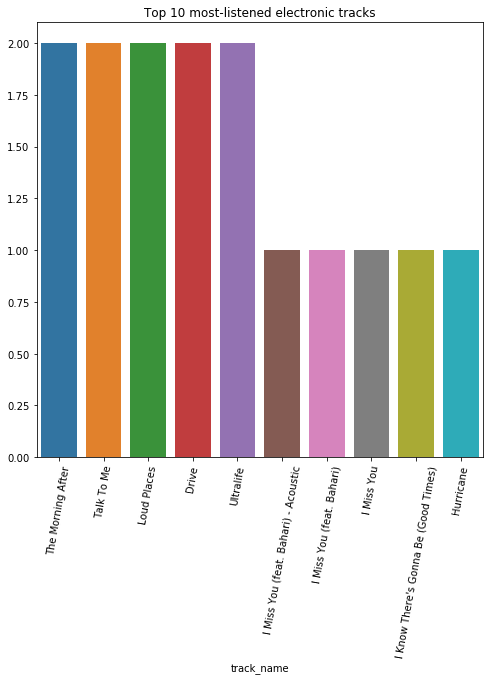

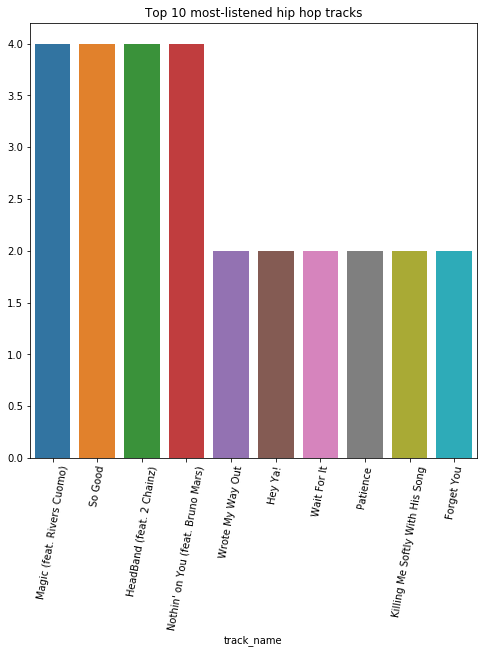

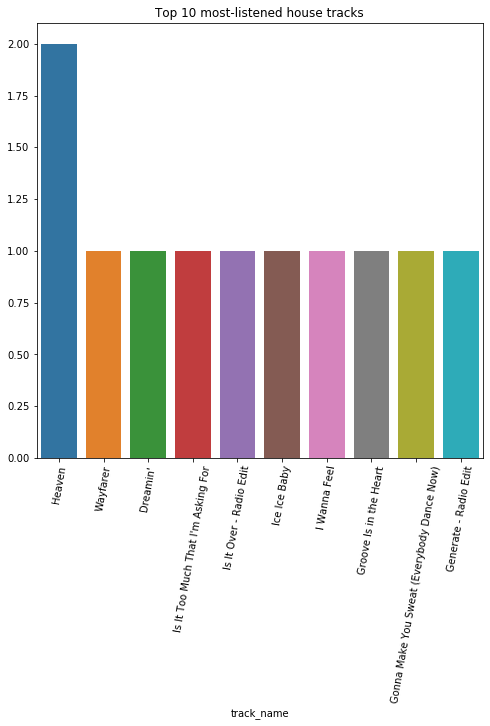

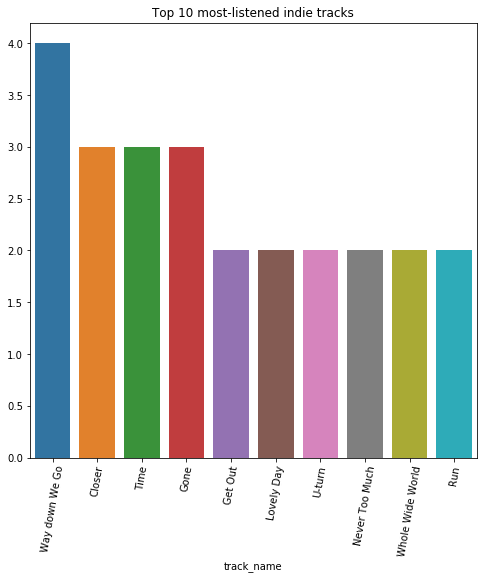

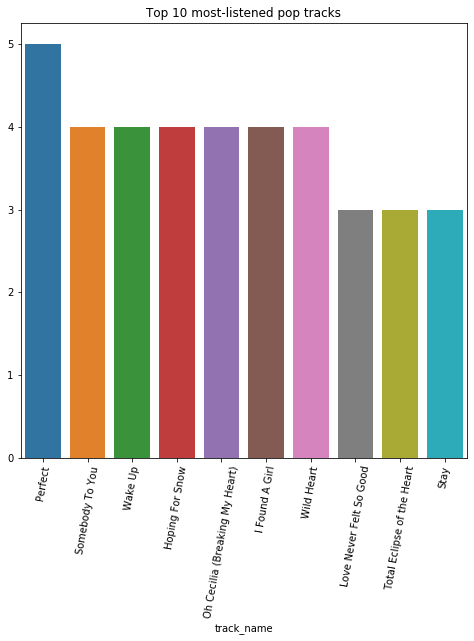

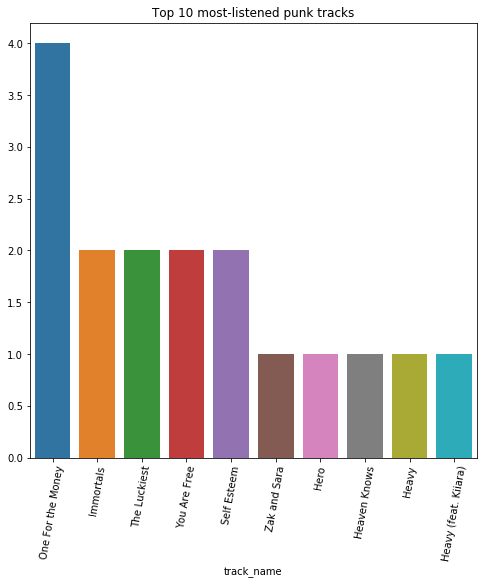

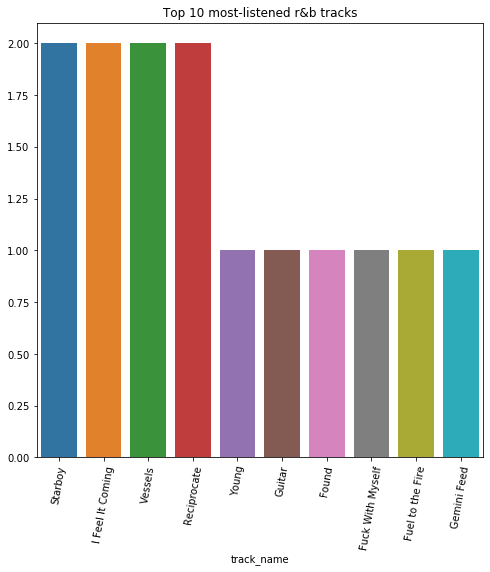

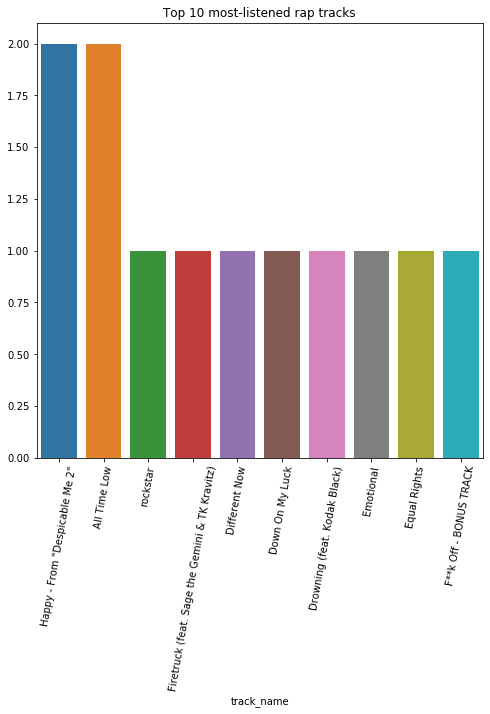

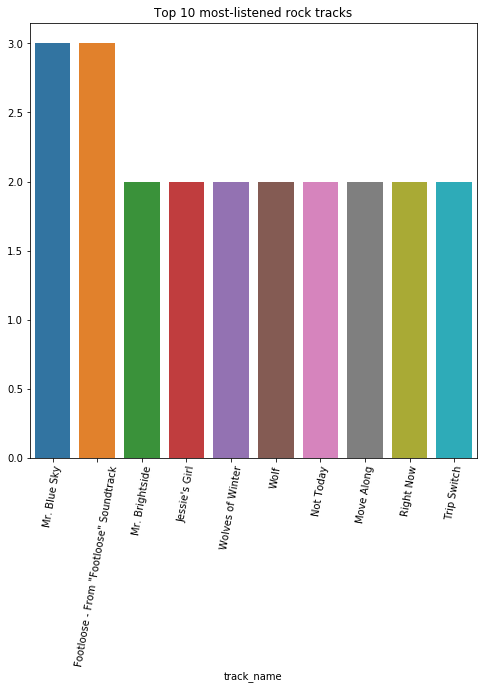

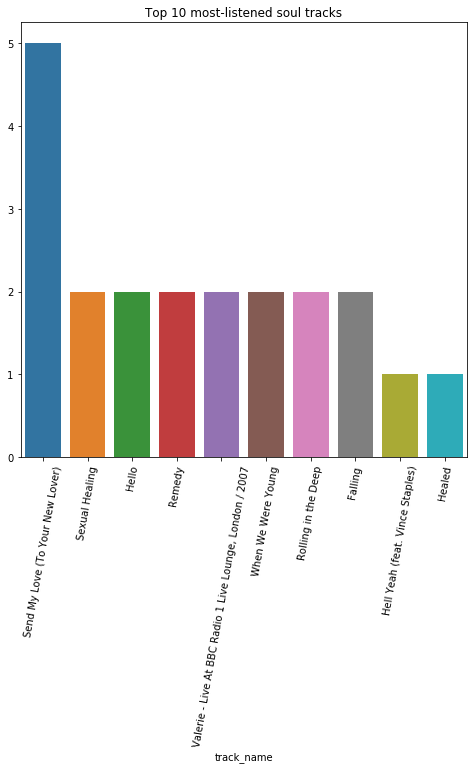

In [32]:
#Create a loop that will plot the top 10 most frequent tracks per genre  
for gen in matrix.columns[1:]:
    x = matrix[(matrix[gen]==True)]
    plt.figure(figsize=(8,8))
    topsongs = x.groupby('track_name').size().sort_values(ascending=False).head(10)
    sns.barplot(topsongs.index, topsongs.values)
    plt.title('Top 10 most-listened '+gen[6:]+' tracks')
    plt.xticks(rotation=80);

In [33]:
#Create a dataframe "matrix2" which only contains track name and genres 
matrix2 = df_inner.drop(['genrecategory', 'is_explicit', 'track_id', 'danceability', 
                  'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 
                  'duration_ms', 'ratings', 'decade_1960', 'decade_1970', 
                  'decade_1980', 'decade_1990', 'decade_2000', 'decade_2010', 
                  'artist_id', 'artist', 'album'], axis=1)

In [34]:
#Look at first two rows in dataframe 
matrix2.head(2)

,track_name,genre_acoustic,genre_country,genre_dance,genre_electronic,genre_hip hop,genre_house,genre_indie,genre_pop,genre_punk,genre_r&b,genre_rap,genre_rock,genre_soul,estimatedrating
0,Firework,0,0,1,0,0,0,0,0,0,0,0,0,0,2.882593
1,California Gurls,0,0,1,0,0,0,0,0,0,0,0,0,0,2.962649


/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

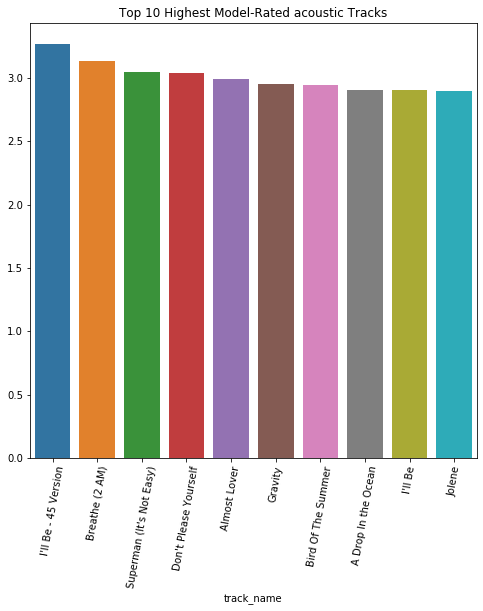

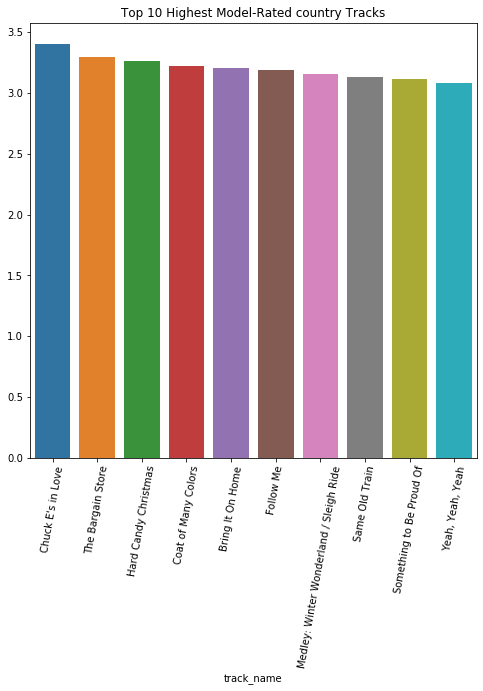

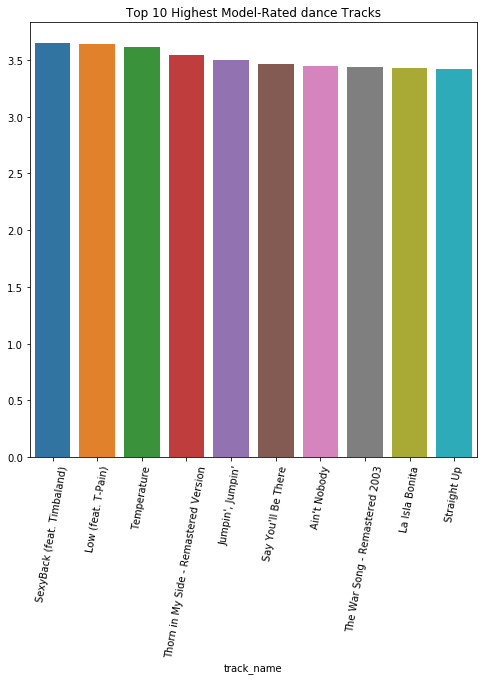

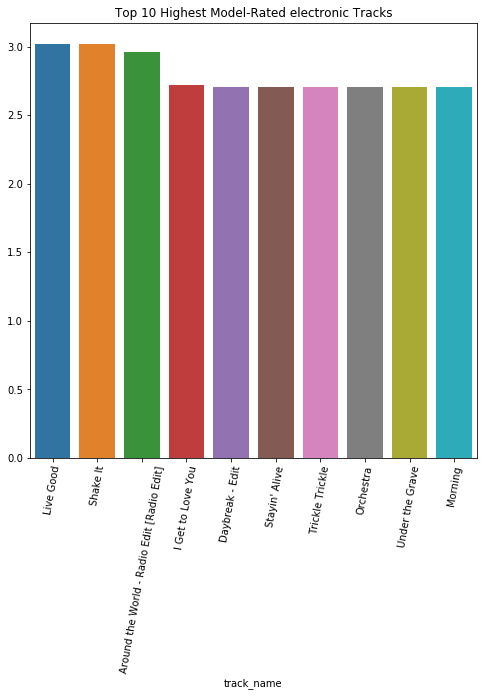

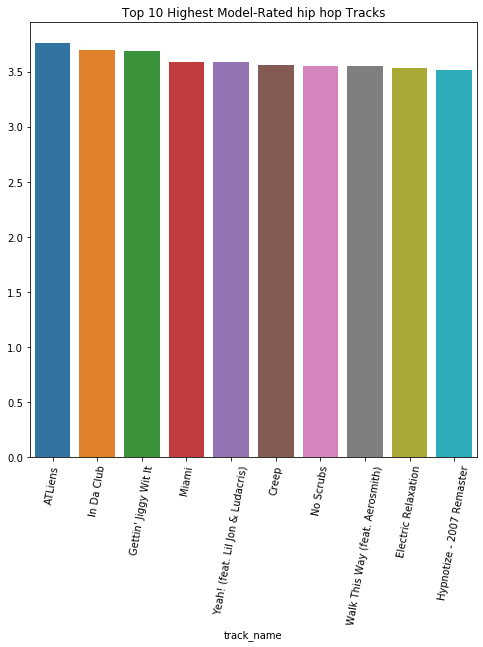

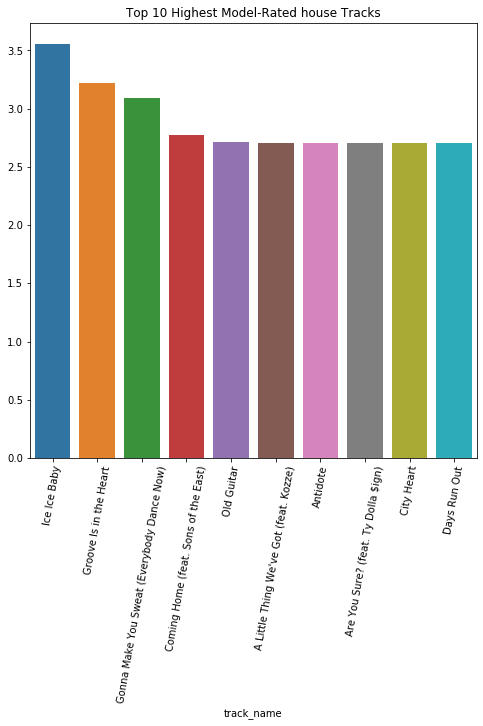

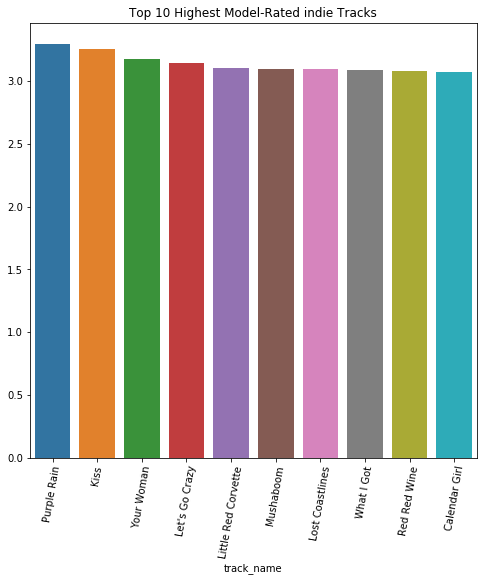

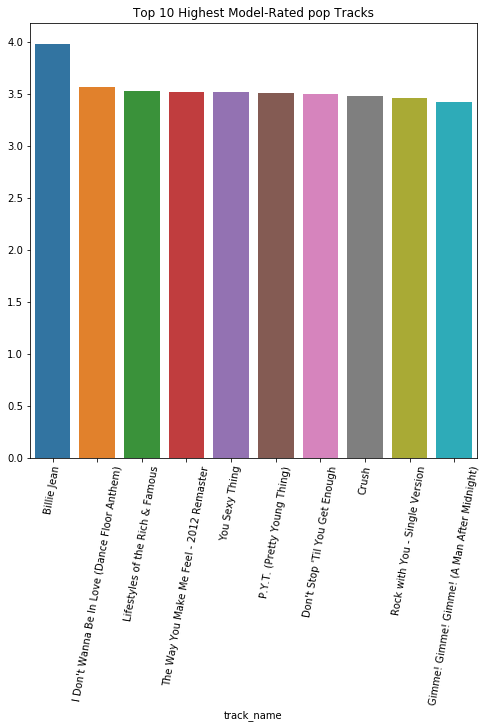

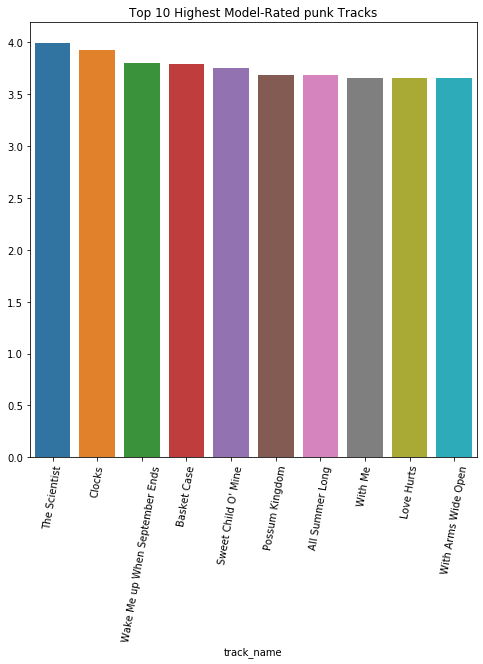

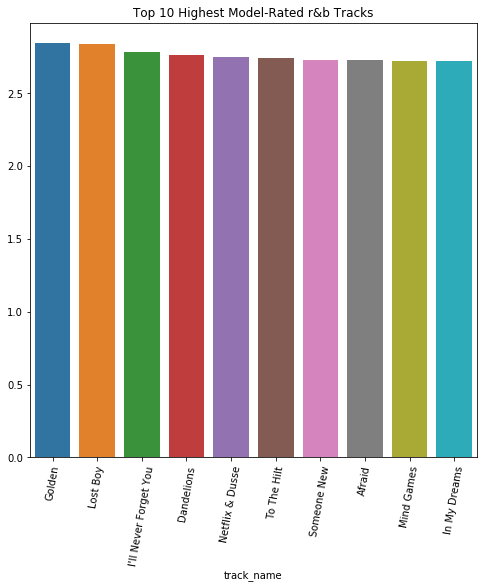

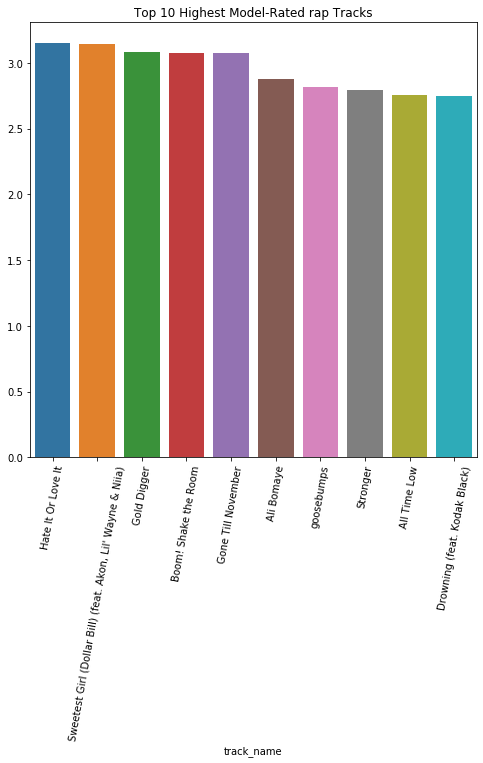

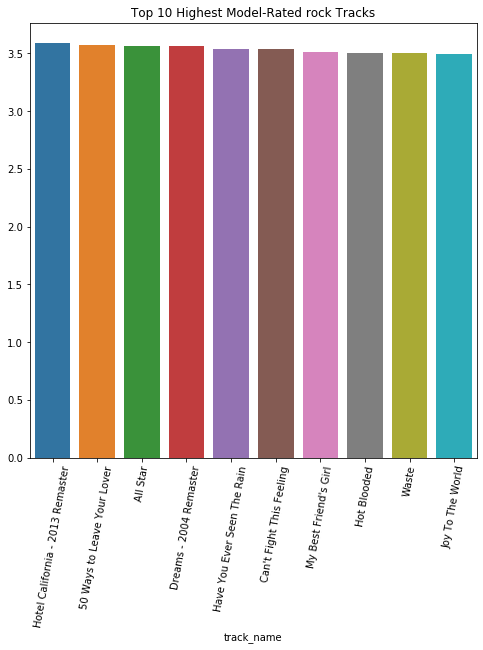

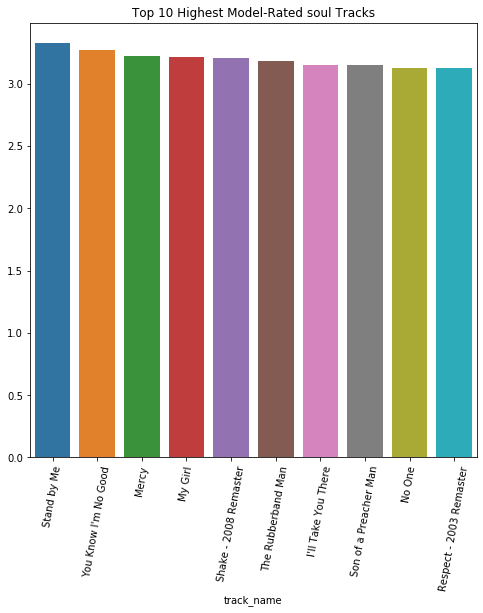

In [35]:
#Plot the top songs with the highest average ratings per genre 
for gen in matrix2.columns[1:-1]:
    x = matrix2[(matrix2[gen]==True)]
    plt.figure(figsize=(8,8))
    topsongs = x.groupby('track_name').mean()['estimatedrating'].sort_values(ascending=False).head(10)
    sns.barplot(topsongs.index, topsongs.values)
    plt.title('Top 10 Highest Model-Rated '+gen[6:]+' Tracks')
    plt.xticks(rotation=80);

In [36]:
#Create a dataframe that only contains the artist names and the genre dummy variables 
matrix3 = df_inner.drop(['genrecategory', 'is_explicit', 'track_id', 'danceability', 
                  'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 
                  'duration_ms', 'ratings', 'decade_1960', 'decade_1970', 
                  'decade_1980', 'decade_1990', 'decade_2000', 'decade_2010', 
                  'artist_id', 'track_name', 'album'], axis=1)

In [37]:
#Print the first two rows of the dataset 
matrix3.head(2)

,artist,genre_acoustic,genre_country,genre_dance,genre_electronic,genre_hip hop,genre_house,genre_indie,genre_pop,genre_punk,genre_r&b,genre_rap,genre_rock,genre_soul,estimatedrating
0,Katy Perry,0,0,1,0,0,0,0,0,0,0,0,0,0,2.882593
1,Katy Perry,0,0,1,0,0,0,0,0,0,0,0,0,0,2.962649


/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

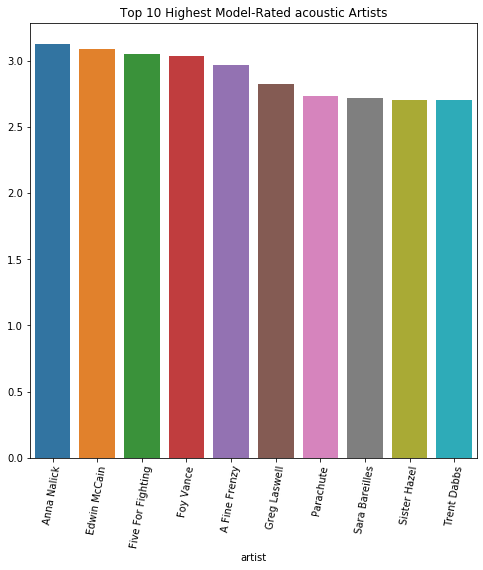

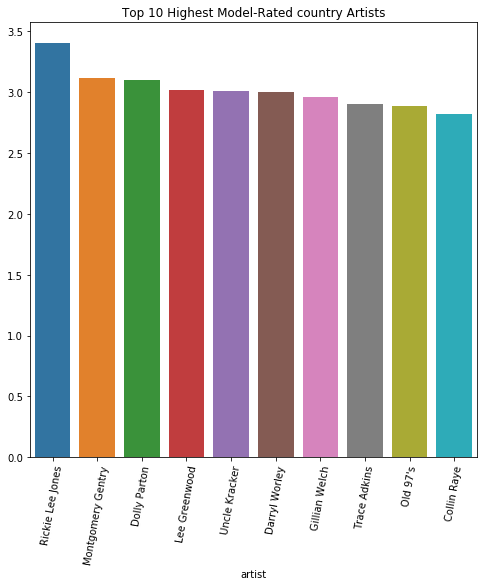

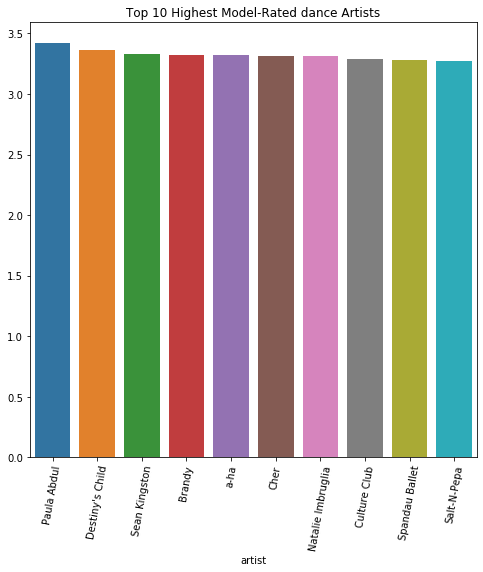

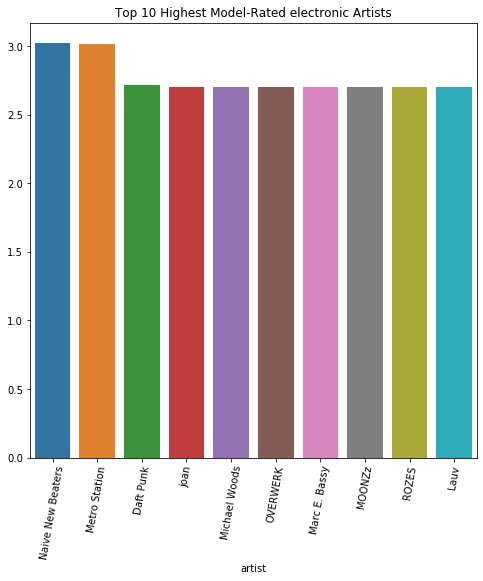

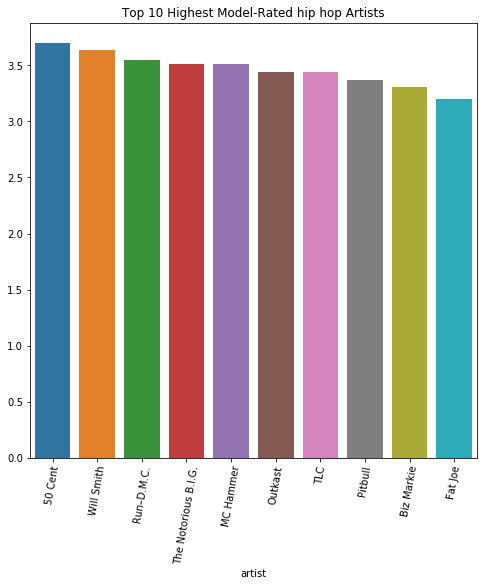

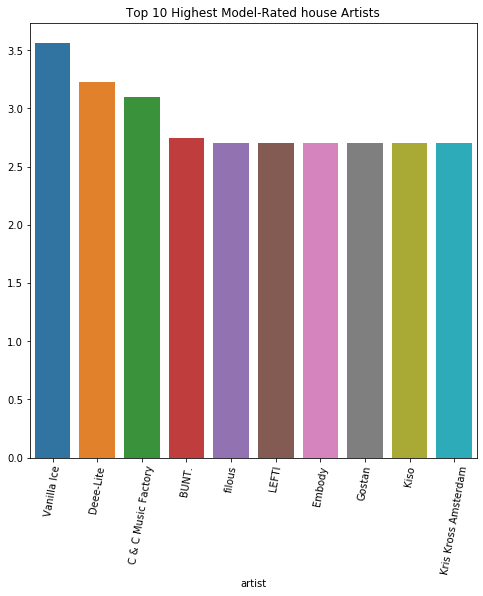

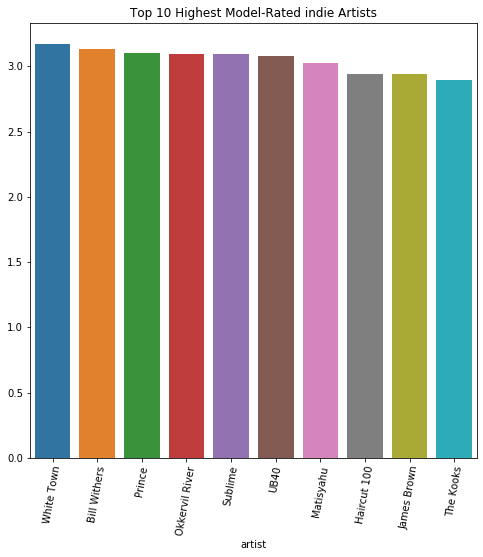

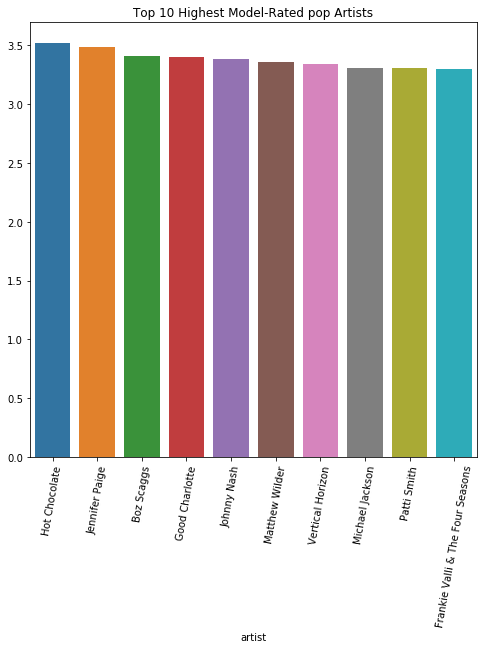

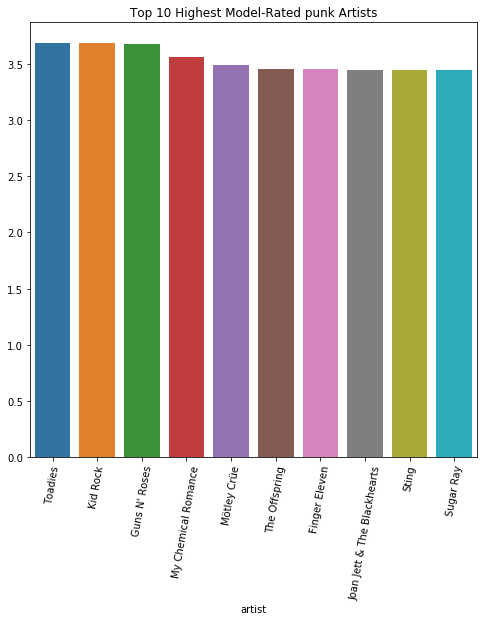

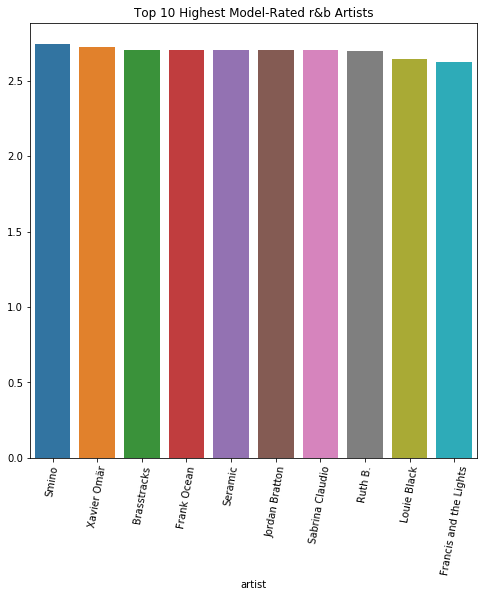

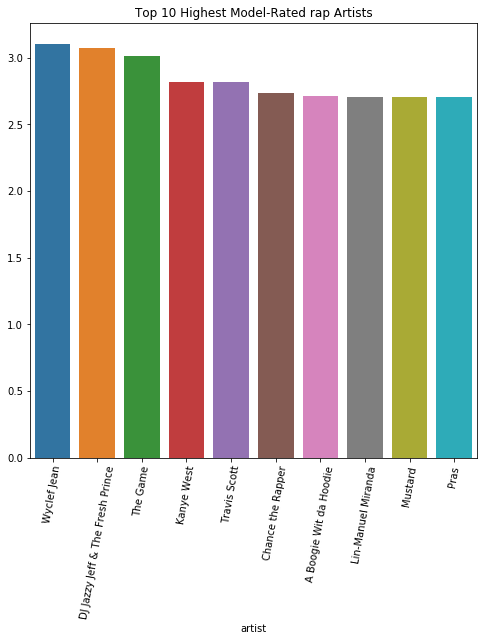

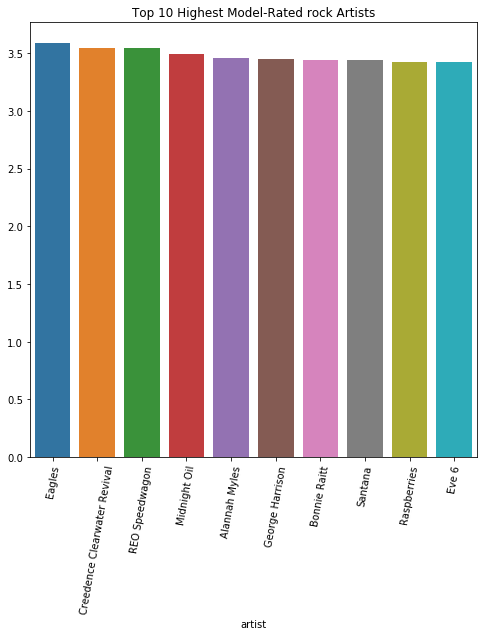

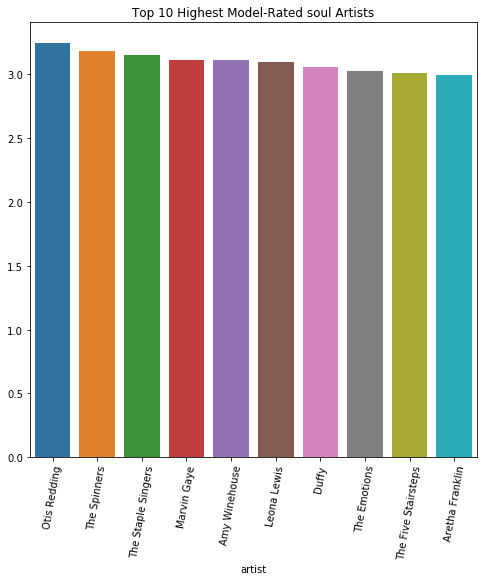

In [38]:
#Plot the top artists with the highest average ratings per genre  
for gen in matrix3.columns[1:-1]:
    x = matrix3[(matrix3[gen]==True)]
    plt.figure(figsize=(8,8))
    topartists = x.groupby('artist').mean()['estimatedrating'].sort_values(ascending=False).head(10)
    sns.barplot(topartists.index, topartists.values)
    plt.title('Top 10 Highest Model-Rated '+gen[6:]+' Artists')
    plt.xticks(rotation=80);

## Investigating the Errors

In [40]:
#Import the dataframe which contains the probabilistic ratings 
dfprobs = pd.read_csv('predictionsdf')

In [41]:
#Look at probabilistic ratings
dfprobs['predicted ratings']

0       2.879912
1       2.969021
2       2.768275
3       3.096658
4       2.780582
          ...   
7036    2.536331
7037    2.513370
7038    2.376517
7039    2.589390
7040    2.693443
Name: predicted ratings, Length: 7041, dtype: float64

In [42]:
#Look at shape of probabilistic ratings 
dfprobs['predicted ratings'].shape

(7041,)

In [43]:
#Now look again at the estimations of these ratings 
df_inner['estimatedrating']

0       2.882593
1       2.962649
2       2.776657
3       3.079690
4       2.794631
          ...   
7004    2.541113
7005    2.517727
7006    2.383838
7007    2.592167
7008    2.705495
Name: estimatedrating, Length: 7009, dtype: float64

In [44]:
#Calculate the errors 
errors = df_inner['estimatedrating'] - dfprobs['predicted ratings']

In [47]:
#Print the first 5 errors 
errors.head()

0    0.002681
1   -0.006372
2    0.008382
3   -0.016968
4    0.014049
dtype: float64

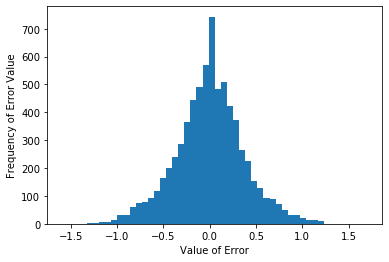

In [46]:
#Plot a histogram of the distribution of errors 
plt.hist(errors,bins=50)
plt.xlabel('Value of Error')
plt.ylabel('Frequency of Error Value')
plt.show()

The errors of our model are centered around 0; majority of the differences that are not - are within -0.25 to 0.25 range. This falls in line with an RMSE of approximately 0.25 which is what we saw for the probabilistic SVD model that was run. This makes sense, as including decimals in the original ratings, rather than just the integers, it results in our predictions being more precise, and therefore our RMSE value decreases. 

**Conclusion:** Our post-modeling EDA shows rather different results than our pre-modeling EDA; this is due to the probabilistic nature of the ratings, allowing our model to produce more precise ratings, and ultimately provide more accurate recommendations. Overall, the model performs very well with a small RMSE of 0.25; we see from the distribution of our errors that the distribution is centered around 0. With the combined classificaiton model and the SVD model, the music app can not only provide recommendations for existing users, but we can avoid the cold-start problem and generate recommendations for new users as well. As the app evolves, the data science team should look to continuously update the recommendation system model as additional user data is collected. 

**Future Work:** While the classification model addresses the cold start problem, the XGBoost model still has a high RMSE. Future work could look at including additional features that may impact a song’s popularity. This could be done by merging data from the Spotify API with data from other music-related APIs, like the genius API. Including information from a new API could also help to improve the SVD model's matrix sparsity, by including additional information as a proxy for artist ID, such as songwriter IDs and producer IDs. Lastly, the features of the model could be implemented into LightFM to see if these elements can be included in the recommendation system.